# Modeling the torso with ellipses, polynomials, and interpolation

UNH Innovation Scholars *Patterns and Symmetry* (TECH 411.05), J. Gibson 2025-03-14.

## Hips, waist, and underbust

Model these with ellipses. Parameterize ellipses with a function $r(\theta)$ that 
provides the radius as a function of $\theta$. Then get Cartesian coordinates $(x,y)$
from $x = r(\theta) \sin \theta$ and $y = r(\theta) \cos \theta$. 

Note this is a little unconventional (usually it's $x = r \cos \theta$ and $y = r \sin \theta$). 
I chose a different convention in order to put the discontinuity in $r(\theta)$ 
at the boundaries of the interval $-\pi \leq \theta \leq \pi$, which is good for polynomial
modeling, and to orient the cross-sections to be left-right symmetric.

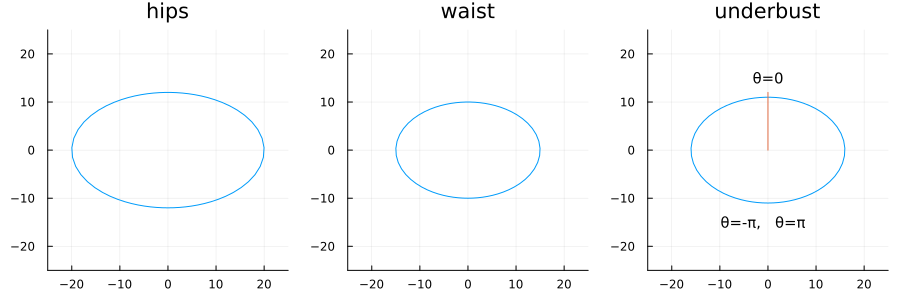

In [266]:
using Plots, LinearAlgebra

# discretize θ with 32 points over -π ≤ θ ≤ π
θ = range(-pi,pi, 64)

# define a function that returns r(θ) for ellipse of axes a,b , so x = r(θ) sin θ, y = r(θ) cos θ
radiusellipse(a,b,θ) = a*b./sqrt.((b*cos.(θ)).^2 + (a*sin.(θ)).^2)

# evaluate ellipses for hips, waist, underbust over vector of θ values
rhips = radiusellipse(12, 20, θ)
rwaist = radiusellipse(10, 15, θ)
runderbust = radiusellipse(11, 16, θ)

Nθ = length(θ)

cosθ = cos.(θ)
sinθ = sin.(θ)
xlim = (-25,25)
ylim = (-25,25)

p1 = plot(sinθ.*rhips, cosθ.*rhips, label="",  title="hips", xlim=xlim, ylim=ylim, aspect_ratio=1)
p2 = plot(sinθ.*rwaist, cosθ.*rwaist, label="", title="waist", xlim=xlim, ylim=ylim,aspect_ratio=1)
p3 = plot(sinθ.*runderbust, cosθ.*runderbust, label="", title="underbust", xlim=xlim, ylim=ylim,aspect_ratio=1)

plot!([0; 0], [12; 0], label="")
annotate!([0], [15], text("θ=0", 10))
annotate!([-1], [-15], text("θ=-π,   θ=π", 10))
#scatter!([0], [14], label="θ=0", legend=:bottomright)
annotate!(10sin(-3), 10cos(-3), "")
p3 = plot!()
plot(p1,p2,p3, layout=(1,3), size=(900,300))

### Model bust with polynomial

Now we devise a polynomial for $r(\theta)$ that makes a decent bust shape. 
I did that by trial and error and educated guessing. 

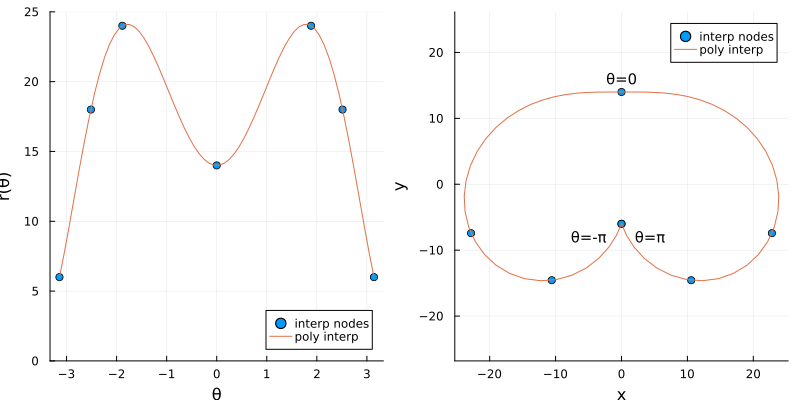

In [298]:
θdata = [-1; -0.8; -0.6; 0.0; 0.6; 0.8; 1.0]*pi
rdata = [6;    18;  24;  14;   24;  18; 6]

# fit polynomial to go through θdata, rdata datapoints
bustpoly = fit(θdata, rdata, 6)

# evaluate bust polynomial over vector of θ values
rbust = bustpoly.(θ)

# plot r(θ) versus θ for bust polynomial
scatter(θdata, rdata, label="interp nodes")
plot!(θ, bustpoly.(θ), label="poly interp")
plot!(xlabel="θ", ylabel="r(θ)", ylim=(0,25))
p3 = plot!()

# plot bust in x,y
scatter(rdata.*sin.(θdata), rdata.*cos.(θdata), label="interp nodes")
plot!(bustpoly.(θ).*sinθ, bustpoly.(θ).*cosθ , label="poly interp")
plot!(xlabel="x", ylabel="y", aspect_ratio=1, legend=:topright)
annotate!([0], [16], text("θ=0", 10))
annotate!([-0.5], [-8], text("θ=-π      θ=π", 10))
p4 = plot!()

plot(p3,p4, size=(800,400))

### Model vertical curves with interpolation

First plot the hips, waist, underbust, and bust as stacked cross-section curves in 3d.

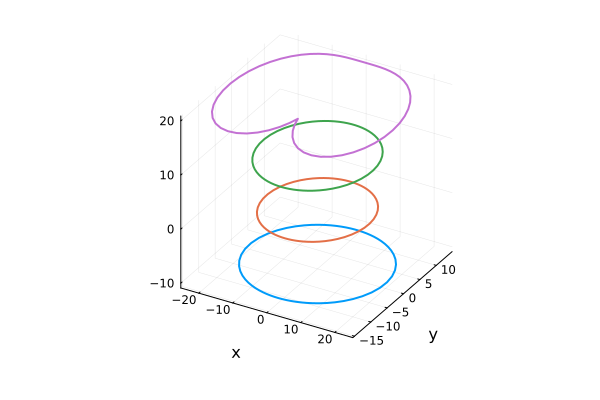

In [301]:
# Put vectors of hips, waist, underbust, and bust radii into a matrix rstack
# Then rstack[1, :] will be a vector of hip radii for each discrete value of θ
# and  rstack[:, n] will be a length-4 vector of the hip, waist, underbust, and bust radii at θ[n]

rstack = [rhips rwaist runderbust rbust] # 4 x Nθ matrix of radius values, at z value, θ[n]
zstack = [-10; 0; 10; 20]  

Nθ = length(θ)
plot()
for n in 1:4 
    plot!(sinθ.*rstack[:,n], cosθ.*rstack[:,n], ones(Nθ)*zmeasurements[n], lw=2,label="")
end
hoops = plot!(xlabel="x", ylabel="y")

Now, for each value of $\theta$ on the grid, interpolate $r$ as a function of the vertical height $z$
and then plot the interpolating polynomial smoothly varying in $z$.

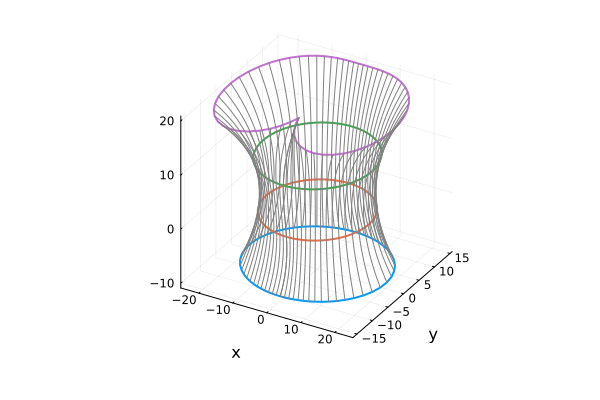

In [302]:
Nθ = length(θ)
plot()

z = range(-10, 20, 64)  # grid of z values for smooth plots of interpolating polynomials
plot(hoops)

for n in 1:Nθ

    # fit polynomial to r as a function of z, going through the four radius values for
    # for hips, waist, underbust, bust at θ=θ[n] at their four vertical z values. 
    poly = fit(zstack, rstack[n,:])

    # evaluate polynomial r(z) over smooth z grid
    r = poly.(z)

    # plot the curved line in x,y,z
    plot!(sin(θ[n])*r, cos(θ[n])*r, z, linecolor=:gray, label="")
end
hoops = plot!(xlabel="x", ylabel="y", aspect_ratio=1)